In [16]:
Marvelous_merians_path = '/data/REPOSITORY/romulus_zooms/'
import pynbody
#scan through all subfolders in the Marvelous_merians_path and add them to the dictionary with just halo 1 in the both halos and goodhalos
#save the resulting dictionary to a file rdz_sims.py
#limit the files to ones that end in 004096
#write function to scan through the files and add them to the dictionary
import os
import re
import numpy as np
import sys
import traceback
overwrite = False
#add the dictionary to the sys path
sys.path.append('../')
try:
    from SimInfoDicts.MerianCDM import Sims
    if not overwrite:
        print('dictionary already exists, set overwrite to True to overwrite')
except:
    print('dictionary does not exist, creating new dictionary')
    Sims = {}
    
def scan_files(path):
    for root, dirs, files in os.walk(path):
        for filename in files:
            full_path = os.path.join(root, filename)
            match = re.search(r'(r\d+\.romulus25\.3072g1HsbBH\.004096/)+r\d+\.romulus25\.3072g1HsbBH\.004096$', full_path)
            if match:
                
                name = re.search(r'r\d+', filename).group()
                if (name in Sims) and (overwrite == False):
                    print(f'{name} already in dictionary')
                    if name == 'r1023':
                        print(Sims[name])
                    else:
                        continue
                print(full_path)
                #check if halo 1 can be loaded in pynbody if it's not already in the dictionary
                goodhalos = []
                try:
                    s = pynbody.load(full_path)
                    halos = s.halos()
                except:
                    print(f'could not load sim in {full_path}')
                try:
                    #some exceptions for the halos that are not halo 1
                    #base name is file name striped of number at the end
                    basename = os.path.basename(filename).split('.')[0]
                    if basename == 'r1023':
                        halo = halos[3]
                        goodhalos.append(3)
                    elif basename == 'r707':
                        halo = halos[2]
                        goodhalos.append(2)
                    elif basename == 'r968':
                        halo = halos[3]
                        goodhalos.append(3)
                    else:
                        halo = halos[1]
                        goodhalos.append(1)                    
                except:
                    print(f'could not load halo  in {full_path}')
                    print(traceback.format_exc())

                
                if len(goodhalos) == 0:
                    print(f'could not load halos in {full_path}')
                    continue
                name = re.search(r'r\d+', filename).group()
                print(f'{name} halo {goodhalos} added to dictionary')
                Sims[name] = {
                    'path': full_path,
                    'halos': goodhalos,
                    'goodhalos': goodhalos
                }
    return Sims

Sims = scan_files(Marvelous_merians_path)
#sort the dictionary by the number after 
Sims = dict(sorted(Sims.items(), key=lambda item: int(item[0][1:])))

print(Sims)


print('scanning complete, saving dictionary to SimInfoDict/MerianCDM.py')
#save the dictionary to a file  as a raw python dictionary
#add line breaks between the dictionary entries and subentries
#overwrite the file if it exists

with open('../SimInfoDicts/MerianCDM.py', 'w') as f: 
    f.write('Sims = {\n')
    for key, value in Sims.items():
        f.write(f'    "{key}": {value},\n')
    f.write('}\n')

dictionary already exists, set overwrite to True to overwrite
r716 already in dictionary
r718 already in dictionary
r761 already in dictionary
r850 already in dictionary
r852 already in dictionary
r916 already in dictionary
r977 already in dictionary
r707 already in dictionary
r753 already in dictionary
r431 already in dictionary
r442 already in dictionary
r468 already in dictionary
r488 already in dictionary
r492 already in dictionary
r502 already in dictionary
r515 already in dictionary
r523 already in dictionary
r544 already in dictionary
r552 already in dictionary
r555 already in dictionary
r556 already in dictionary
r563 already in dictionary
r568 already in dictionary
r569 already in dictionary
r571 already in dictionary
r597 already in dictionary
r613 already in dictionary
r614 already in dictionary
r615 already in dictionary
r618 already in dictionary
r634 already in dictionary
r642 already in dictionary
r656 already in dictionary
r886 already in dictionary
r918 already in dict

In [15]:
#print sim and  halo only  in MerianCDM.py 

import sys
for key, value in Sims.items():
    print(key, value['goodhalos'])




r431 [1]
r442 [1]
r468 [1]
r488 [1]
r489 [1]
r492 [1]
r502 [1]
r515 [1]
r523 [1]
r544 [1]
r552 [1]
r555 [1]
r556 [1]
r563 [1]
r568 [1]
r569 [1]
r571 [1]
r597 [1]
r613 [1]
r614 [1]
r615 [1]
r618 [1]
r634 [1]
r642 [1]
r656 [1]
r707 [2]
r716 [1]
r718 [1]
r753 [1]
r761 [1]
r850 [1]
r852 [1]
r886 [1]
r916 [1]
r918 [1]
r968 [3]
r977 [1]
r1023 [1]


In [2]:
import os
import re
import sys
import pynbody

In [3]:

def scan_files_with_pattern(path, sim_name, search_pattern):
    sys.path.append('../')
    dict_name = f'{sim_name}.py'
    overwrite = True
    Sims = {}
    if overwrite==False:
        try:
            sim_module = __import__(f"SimInfoDicts.{sim_name}", fromlist=[None])
            Sims = getattr(sim_module, 'Sims')
            overwrite = False
        except ModuleNotFoundError:
            print(f'{dict_name} does not exist, creating new dictionary')
            Sims = {}
            overwrite = True

    for root, dirs, files in os.walk(path):
        for filename in files:
            full_path = os.path.join(root, filename)
            match = re.search(search_pattern, full_path)
            if match:
                name = re.search(r'r\d+', filename).group()

                if (name in Sims) and not overwrite:
                    print(f'{name} already in dictionary')
                    continue
                try:
                    s = pynbody.load(full_path)
                    h1 = s.halos()[1]
                except:
                    print(f'could not load halo 1 in {full_path}')
                    continue

                Sims[name] = {
                    'path': full_path,
                    'halos': [1],
                    'goodhalos': [1]
                }
                print(f'{name} added to dictionary')

    Sims = dict(sorted(Sims.items(), key=lambda item: int(item[0][1:])))
    print('Scanning complete, saving dictionary to SimInfoDicts/' + dict_name)
    with open(f'../SimInfoDicts/{dict_name}', 'w') as f:
        f.write('Sims = {\n')
        for key, value in Sims.items():
            f.write(f'    "{key}": {value},\n')
        f.write('}\n')

In [45]:
path, sim_name, search_pattern, = '/home/bk639/data/MerianCDM', 'MerianCDM', r'(r\d+\.romulus25\.3072g1HsbBH\.004096/)+r\d+\.romulus25\.3072g1HsbBH\.004096$'

scan_files_with_pattern(path, sim_name, search_pattern)


could not load halo 1 in /home/bk639/data/MerianCDM/r1023.romulus25.3072g1HsbBH/r1023.romulus25.3072g1HsbBH.004096/r1023.romulus25.3072g1HsbBH.004096
r431 added to dictionary
r442 added to dictionary
r468 added to dictionary
r488 added to dictionary
r489 added to dictionary
r492 added to dictionary
r502 added to dictionary
r515 added to dictionary
r523 added to dictionary
r544 added to dictionary
r552 added to dictionary
r555 added to dictionary
r556 added to dictionary
r563 added to dictionary
r568 added to dictionary
r569 added to dictionary
r571 added to dictionary
r597 added to dictionary
r613 added to dictionary
r614 added to dictionary
r615 added to dictionary
r618 added to dictionary
r634 added to dictionary
r642 added to dictionary
r656 added to dictionary
could not load halo 1 in /home/bk639/data/MerianCDM/r707.romulus25.3072g1HsbBH/r707.romulus25.3072g1HsbBH.004096/r707.romulus25.3072g1HsbBH.004096
r716 added to dictionary
r718 added to dictionary
r753 added to dictionary
r76

In [16]:

path, sim_name, search_pattern, = '/data/akaxia/rzooms/', 'MerianSIDM', r'(r\d+\.romulus25si2s50v35\.3072g1HsbBH/)+r\d+\.romulus25si2s50v35\.3072g1HsbBH\.004096$'

scan_files_with_pattern(path, sim_name, search_pattern)


pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r634.romulus25si2s50v35.3072g1HsbBH/r634.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r634.romulus25si2s50v35.3072g1HsbBH/r634.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r492.romulus25si2s50v35.3072g1HsbBH/r492.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r492.romulus25si2s50v35.3072g1HsbBH/r492.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos


r634 added to dictionary


pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r468.romulus25si2s50v35.3072g1HsbBH/r468.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r468.romulus25si2s50v35.3072g1HsbBH/r468.romulus25si2s50v35.3072g1HsbBH.004096


r492 added to dictionary


pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos
pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r488.romulus25si2s50v35.3072g1HsbBH/r488.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r488.romulus25si2s50v35.3072g1HsbBH/r488.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos


r468 added to dictionary


pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r544.romulus25si2s50v35.3072g1HsbBH/r544.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r544.romulus25si2s50v35.3072g1HsbBH/r544.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos


r488 added to dictionary


pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/rzooms/r618.romulus25si2s50v35.3072g1HsbBH/r618.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/rzooms/r618.romulus25si2s50v35.3072g1HsbBH/r618.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos
pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded


r544 added to dictionary


pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/rzooms/r523.romulus25si2s50v35.3072g1HsbBH/r523.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/rzooms/r523.romulus25si2s50v35.3072g1HsbBH/r523.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos


r618 added to dictionary


pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r597.romulus25si2s50v35.3072g1HsbBH/r597.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/akaxia/rzooms/r597.romulus25si2s50v35.3072g1HsbBH/r597.romulus25si2s50v35.3072g1HsbBH.004096
pynbody.halo : AHFCatalogue loading particles
pynbody.halo : AHFCatalogue loading halos


r523 added to dictionary


pynbody.halo : AHFCatalogue loading substructure
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : AHFCatalogue loaded


r597 added to dictionary
Scanning complete, saving dictionary to SimInfoDicts/MerianSIDM.py


In [46]:

import pynbody


In [48]:
sim = pynbody.load('/home/bk639/data/Marvel/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096')
sim.physical_units()
halo = sim.halos()[1]

In [49]:
pynbody.analysis.angmom.faceon(halo)



1.3073490762870112


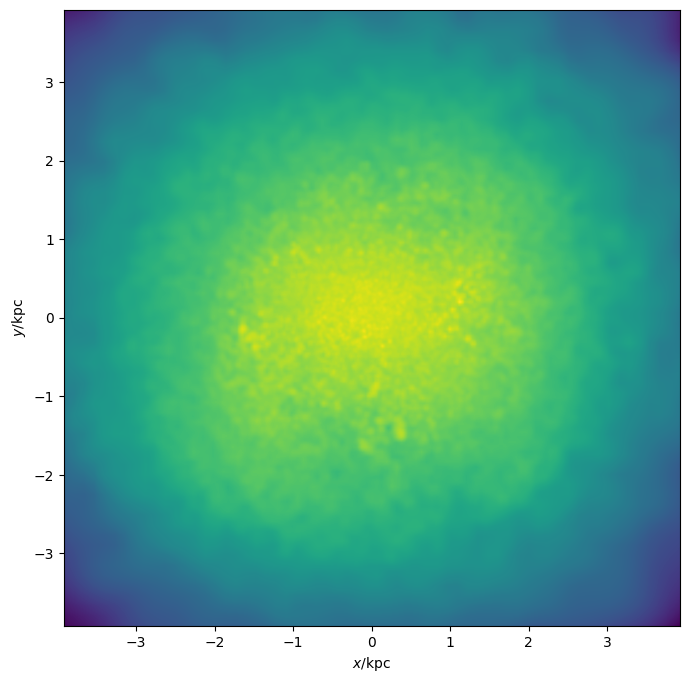

In [50]:
#create a simple slice of gas density
import pynbody.plot.sph as sph
import matplotlib.pylab as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
from pynbody.plot.sph import image
import numpy as np
Rhalf = pynbody.analysis.luminosity.half_light_r(halo)
print(Rhalf)
width = 6*Rhalf
ImageSpace = pynbody.filt.Sphere(width*np.sqrt(2)*1.01)
im = image(sim[ImageSpace].s, qty='v_lum_den', width=width, subplot=ax, units='kpc^-2', resolution=1000, show_cbar=False)
plt.show()


In [38]:

prof = pynbody.analysis.profile.Profile(sim[ImageSpace].s,type='lin',rmin=.1*Rhalf,rmax=5*Rhalf,ndim=2,nbins = int(5*Rhalf/0.1))


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [33]:
(5*Rhalf)

SimArray(0.00044968, 'kpc')